<a href="https://colab.research.google.com/github/Jamakasilwane/EDSA_Zindi_Hackathon/blob/master/EDSA_Zindi_Hackathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working as a group on this Notebook

## import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing the dataset

In [2]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")
dataset_sample = pd.read_csv("SampleSubmission.csv")
X1 = dataset_train.loc[:,['Order No','Distance (KM)','Temperature']]
Y_train = dataset_train.loc[:,['Time from Pickup to Arrival']].values
X2 = dataset_test.loc[:,['Order No','Distance (KM)','Temperature']]
Y_test = dataset_sample.iloc[:,-1].values
var = pd.read_csv('VariableDefinitions.csv')

In [3]:
#changing the Index for both X_train & X_test Dataframes to be Order No and convert the Dataframes to Numpy arrays
X_train = X1.set_index('Order No').values
X_test = X2.set_index('Order No').values

In [4]:
dataset_test.head()

Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   
3  Order_No_15332  User_Id_2910         Bike              3   
4  Order_No_21373  User_Id_1205         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        27   
1             Business                        17   
2             Business                        27   
3             Business                        17   
4             Business                        11   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             3       4:44:10 PM                           27   
1                             5      12:57:35 PM                           17   
2                             4      11:08:14 AM                           27   
3                             1       1:51:35 PM                           17   
4                             2      11:30:28 AM                           11   

   Confirmation - Weekday (Mo = 1)  ... Pickup - Weekday (Mo = 1)  \
0                                3  ...                         3   
1                                5  ...                         5   
2                                4  ...                         4   
3                                1  ...                         1   
4                                2  ...                         2   

   Pickup - Time  Distance (KM) Temperature  Precipitation in millimeters  \
0     5:06:47 PM              8         NaN                           NaN   
1     1:25:37 PM              5         NaN                           NaN   
2    11:57:54 AM              5        22.8                           NaN   
3     2:16:52 PM              5        24.5                           NaN   
4    11:56:04 AM              6        24.4                           NaN   

   Pickup Lat Pickup Long  Destination Lat  Destination Long      Rider Id  
0   -1.333275   36.870815        -1.305249         36.822390  Rider_Id_192  
1   -1.272639   36.794723        -1.277007         36.823907  Rider_Id_868  
2   -1.290894   36.822971        -1.276574         36.851365   Rider_Id_26  
3   -1.290503   36.809646        -1.303382         36.790658  Rider_Id_685  
4   -1.281081   36.814423        -1.266467         36.792161  Rider_Id_858  

[5 rows x 25 columns]

In [5]:
dataset_train.head()

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   
3                             5       9:25:34 AM                           15   
4                             1       9:55:18 AM                           13   

   Confirmation - Weekday (Mo = 1)  ... Arrival at Destination - Time  \
0                                5  ...                   10:39:55 AM   
1                                5  ...                   12:17:22 PM   
2                                2  ...                    1:00:38 PM   
3                                5  ...                   10:05:27 AM   
4                                1  ...                   10:25:37 AM   

   Distance (KM)  Temperature Precipitation in millimeters  Pickup Lat  \
0              4         20.4                          NaN   -1.317755   
1             16         26.4                          NaN   -1.351453   
2              3          NaN                          NaN   -1.308284   
3              9         19.2                          NaN   -1.281301   
4              9         15.4                          NaN   -1.266597   

   Pickup Long Destination Lat  Destination Long      Rider Id  \
0    36.830370       -1.300406         36.829741  Rider_Id_432   
1    36.899315       -1.295004         36.814358  Rider_Id_856   
2    36.843419       -1.300921         36.828195  Rider_Id_155   
3    36.832396       -1.257147         36.795063  Rider_Id_855   
4    36.792118       -1.295041         36.809817  Rider_Id_770   

  Time from Pickup to Arrival  
0                         745  
1                        1993  
2                         455  
3                        1341  
4                        1214  

[5 rows x 29 columns]

# Taking Care of missing values in the Data sets

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train[:,1:2],X_test[:,1:2])
X_train[:,1:2] = imputer.transform(X_train[:,1:2])
X_test[:,1:2] = imputer.transform(X_test[:,1:2])

In [8]:
X_train

array([[ 4. , 20.4],
       [16. , 26.4],
       [ 3. , 24.7],
       ...,
       [20. , 29.2],
       [13. , 15. ],
       [12. , 30.9]])

# Plotting the Scatter plot for the Training Data set and also the Test Data set

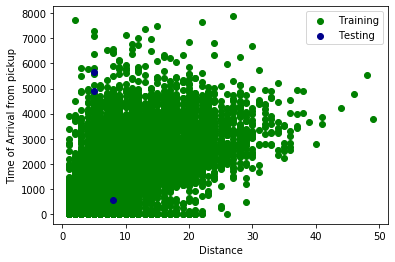

In [9]:
# plot the results
plt.scatter(X_train[:,0], Y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test[:,0], Y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Time of Arrival from pickup')
plt.show()

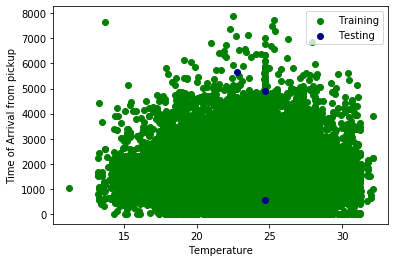

In [10]:
# plot the results
plt.scatter(X_train[:,1], Y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test[:,1], Y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Time of Arrival from pickup')
plt.show()

# Feature Scaling of the training and test data set

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [13]:
X_train

array([[-0.97137039, -0.96379402],
       [ 1.14546888,  0.86870998],
       [-1.14777366,  0.34950052],
       ...,
       [ 1.85108197,  1.72387852],
       [ 0.61625906, -2.61304762],
       [ 0.43985579,  2.24308798]])

# fitting the model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
beta_0 = float(regressor.intercept_)

In [17]:
print(beta_0)

1556.9209471251356


In [18]:
#predicting y using the X_test
y_pred = regressor.predict(X_test)

In [19]:
#comparing the y_pred with the actual Y values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1406.14  567.  ]
 [1102.79 4903.  ]
 [1100.2  5649.  ]
 ...
 [1608.93     nan]
 [2415.82     nan]
 [1402.87     nan]]


In [20]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted = X2[['Order No','Time from Pickup to Arrival']]

In [21]:
predicted

Order No  Time from Pickup to Arrival
0     Order_No_19248                      1406.14
1     Order_No_12736                      1102.79
2       Order_No_768                      1100.20
3     Order_No_15332                      1102.52
4     Order_No_21373                      1203.50
...              ...                          ...
7063   Order_No_3612                      1102.93
7064   Order_No_7657                      2829.98
7065   Order_No_1969                      1608.93
7066  Order_No_10591                      2415.82
7067   Order_No_1603                      1402.87

[7068 rows x 2 columns]

In [ ]:
#save the results as the .csv file
predicted.to_csv('predicted_time.csv',index=False)